In [28]:
import re
import pandas as pd
import numpy as np
from sklearn import ensemble, model_selection, decomposition, preprocessing, tree, svm, linear_model
from matplotlib import pyplot as plt

In [2]:
# 又一步探索泰坦尼克号数据
data = pd.read_csv('./data/train.csv')
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB


In [5]:
data[['Pclass', 'Survived']].groupby(['Pclass']).mean() 

,Survived
Pclass,
1,0.629630
2,0.472826
3,0.242363


In [6]:
# 去除Pclass 当索引 由下表可知Pclass对Survived的影响
data[['Pclass', 'Survived']].groupby(['Pclass'], as_index=False).mean()

,Pclass,Survived
0,1,0.629630
1,2,0.472826
2,3,0.242363


In [8]:
data[['Sex', 'Survived']].groupby(['Sex'], as_index=False).mean()

,Sex,Survived
0,female,0.742038
1,male,0.188908


In [9]:
# 增加一列新的特征FamilySize  SibSp 兄弟姐妹的数量  Parch 父母和孩子的数量
data['FamilySize'] = data['SibSp'] + data['Parch']
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,FamilySize
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,1
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,1
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,0


In [10]:
data[['FamilySize', 'Survived']].groupby(['FamilySize'], as_index=False).mean()

,FamilySize,Survived
0,0,0.303538
1,1,0.552795
2,2,0.578431
3,3,0.724138
4,4,0.200000
5,5,0.136364
6,6,0.333333
7,7,0.000000
8,10,0.000000


In [12]:
data['isAlone'] = (data['FamilySize'] == 1).astype(int)
data

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,FamilySize,isAlone
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,1,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,1,1
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,0,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,1,1
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,0,0
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q,0,0
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S,0,0
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S,4,0
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S,2,0
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C,1,1


In [13]:
data[['isAlone', 'Survived']].groupby(['isAlone'], as_index=False).mean()

,isAlone,Survived
0,0,0.346575
1,1,0.552795


In [14]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 14 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
FamilySize     891 non-null int64
isAlone        891 non-null int64
dtypes: float64(2), int64(7), object(5)
memory usage: 97.5+ KB


In [17]:
data['Embarked'].unique()

array(['S', 'C', 'Q', nan], dtype=object)

In [18]:
data['Embarked'].value_counts()

S    644
C    168
Q     77
Name: Embarked, dtype: int64

In [19]:
# 以众数填充缺失值
data['Embarked'] = data['Embarked'].fillna('S')

In [20]:
data['Embarked'].unique()

array(['S', 'C', 'Q'], dtype=object)

In [26]:
# 使每个箱子中样本数量相等 pd.cut等间隔分割数据
pd.qcut(data['Fare'], 4).value_counts()

(7.91, 14.454]     224
(-0.001, 7.91]     223
(31.0, 512.329]    222
(14.454, 31.0]     222
Name: Fare, dtype: int64

In [58]:
data['CategoricalFare'] = pd.qcut(data['Fare'], 4, labels=[0, 1, 2, 3])
data

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,FamilySize,isAlone,CategoricalFare,Title
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,1,1,0,Mr
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,1,1,3,Mrs
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,0,0,1,Miss
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,1,1,3,Mrs
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,0,0,1,Mr
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q,0,0,1,Mr
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S,0,0,3,Mr
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S,4,0,2,Master
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S,2,0,1,Mrs
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C,1,1,2,Mrs


In [25]:
data[['CategoricalFare', 'Survived']].groupby(['CategoricalFare'], as_index=False).mean()

,CategoricalFare,Survived
0,"(-0.001, 7.91]",0.197309
1,"(7.91, 14.454]",0.303571
2,"(14.454, 31.0]",0.454955
3,"(31.0, 512.329]",0.581081


In [47]:
# 提取中间的名字  Braund, Mr. Owen Harris -> Mr
data.loc[7, 'Name'].replace(' ', '')

'Palsson,Master.GostaLeonard'

In [49]:
re.split(r'[,.]', data.loc[7, 'Name'].replace(' ', ''))


['Palsson', 'Master', 'GostaLeonard']

In [50]:
re.split(r'[,.]', data.loc[7, 'Name'].replace(' ', ''))[1]


'Master'

In [51]:
data['Title'] = data['Name'].apply(lambda x: re.split(r'[,.]', x.replace(' ', ''))[1])

In [52]:
data.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,FamilySize,isAlone,CategoricalFare,Title
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,1,1,"(-0.001, 7.91]",Mr
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,1,1,"(31.0, 512.329]",Mrs
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,0,0,"(7.91, 14.454]",Miss
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,1,1,"(31.0, 512.329]",Mrs
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,0,0,"(7.91, 14.454]",Mr
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q,0,0,"(7.91, 14.454]",Mr
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S,0,0,"(31.0, 512.329]",Mr
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S,4,0,"(14.454, 31.0]",Master
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S,2,0,"(7.91, 14.454]",Mrs
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C,1,1,"(14.454, 31.0]",Mrs


In [53]:
pd.crosstab(data['Title'], data['Sex'])

Sex,female,male
Title,,
Capt,0,1
Col,0,2
Don,0,1
Dr,1,6
Jonkheer,0,1
Lady,1,0
Major,0,2
Master,0,40
Miss,182,0


In [54]:
data['Title'] = data['Title'].replace(['Lady', 'theCountess','Capt', 'Col',\
'Don', 'Dr', 'Major', 'Rev', 'Sir', 'Jonkheer', 'Dona'], 'Rare')

data['Title'] = data['Title'].replace('Mlle', 'Miss')
data['Title'] = data['Title'].replace('Ms', 'Miss')
data['Title'] = data['Title'].replace('Mme', 'Mrs')

In [56]:
data['Title'].value_counts()

Mr        517
Miss      185
Mrs       126
Master     40
Rare       23
Name: Title, dtype: int64

In [57]:
data[['Title', 'Survived']].groupby(['Title'], as_index=False).mean()

,Title,Survived
0,Master,0.575000
1,Miss,0.702703
2,Mr,0.156673
3,Mrs,0.793651
4,Rare,0.347826


In [59]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 16 columns):
PassengerId        891 non-null int64
Survived           891 non-null int64
Pclass             891 non-null int64
Name               891 non-null object
Sex                891 non-null object
Age                714 non-null float64
SibSp              891 non-null int64
Parch              891 non-null int64
Ticket             891 non-null object
Fare               891 non-null float64
Cabin              204 non-null object
Embarked           891 non-null object
FamilySize         891 non-null int64
isAlone            891 non-null int64
CategoricalFare    891 non-null category
Title              891 non-null object
dtypes: category(1), float64(2), int64(7), object(6)
memory usage: 105.5+ KB


In [60]:
# Cabin 缺失值太多 直接删掉
data.drop(['Cabin'],axis=1, inplace=True)

In [61]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
PassengerId        891 non-null int64
Survived           891 non-null int64
Pclass             891 non-null int64
Name               891 non-null object
Sex                891 non-null object
Age                714 non-null float64
SibSp              891 non-null int64
Parch              891 non-null int64
Ticket             891 non-null object
Fare               891 non-null float64
Embarked           891 non-null object
FamilySize         891 non-null int64
isAlone            891 non-null int64
CategoricalFare    891 non-null category
Title              891 non-null object
dtypes: category(1), float64(2), int64(7), object(5)
memory usage: 98.6+ KB


In [ ]:
# 将性别和标题映射成数字
data['Sex'] = data['Sex'].map( {'female': 0, 'male': 1} ).astype(int)
title_mapping = {"Mr": 1, "Miss": 2, "Mrs": 3, "Master": 4, "Rare": 5}
data['Title'] = data['Title'].map(title_mapping).astype(int)
data['Title'] = data['Title'].fillna(0)

In [65]:
# 删除Name，Fare，Ticket
data.drop(['Name', 'Fare', 'Ticket'],axis=1, inplace=True)

In [69]:
# data['Embarked'].unique().tolist() # ['S', 'C', 'Q']
data['Embarked'] = data['Embarked'].apply(lambda x: data['Embarked'].unique().tolist().index(x))

In [70]:
data.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Embarked,FamilySize,isAlone,CategoricalFare,Title
0,1,0,3,1,22.0,1,0,0,1,1,0,1
1,2,1,1,0,38.0,1,0,1,1,1,3,3
2,3,1,3,0,26.0,0,0,0,0,0,1,2
3,4,1,1,0,35.0,1,0,0,1,1,3,3
4,5,0,3,1,35.0,0,0,0,0,0,1,1


In [71]:
# 只有age有缺失项 尝试使用随机森林回归进行填充
x_train = data.loc[data['Age'].notnull(), data.columns != 'Age']
y_train = data.loc[data['Age'].notnull(), 'Age']

x_test = data.loc[data['Age'].isnull(), data.columns != 'Age']
y_test = data.loc[data['Age'].isnull(), 'Age']
clf = ensemble.RandomForestRegressor(n_estimators=100, n_jobs=-1).fit(x_train, y_train)
pred = clf.predict(x_test)
data.loc[data['Age'].isnull(), 'Age'] = pred
data.to_csv('./temp/train_data_03.csv', index=False)

In [72]:
# 然后开始拆分训练集和测试集
# 先分训练集和测试集 
X = data.loc[:, data.columns != 'Survived']
y = data.loc[:, 'Survived']
X_train, X_test, y_train, y_test = model_selection.train_test_split(X, y, test_size=0.3, random_state=66)

In [73]:
for i in [X_train, X_test, y_train, y_test]:
    i.index = range(i.shape[0])

In [75]:
clf = ensemble.RandomForestClassifier(n_estimators=100).fit(X_train, y_train)
score = clf.score(X_test, y_test)
mean_score = model_selection.cross_val_score(clf, X, y, cv=10).mean()
print(score, '---', mean_score)

0.8544776119402985 --- 0.8373246510044263


0.8272242083758938 141


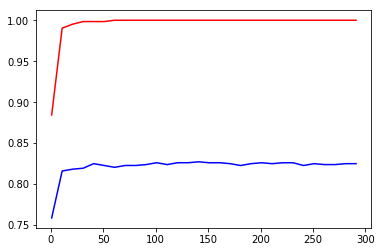

In [76]:
# 细化n_estimators的学习曲线  由下图可知可能出现了过拟合
train_scores = []
test_scores = []
x_ticks = [*range(1, 300, 10)]
for i in range(1, 300, 10):
    clf = ensemble.RandomForestClassifier(n_estimators=i, random_state=66)
    train_score = clf.fit(X_train, y_train).score(X_train, y_train)
    train_scores.append(train_score)
    
    mean_score = model_selection.cross_val_score(clf, X, y, cv=10).mean()
    test_scores.append(mean_score)
plt.plot(x_ticks, train_scores, c='r')
plt.plot(x_ticks, test_scores, c='b')
print(max(test_scores), x_ticks[test_scores.index(max(test_scores))])
plt.show()

0.8372364090341617 10


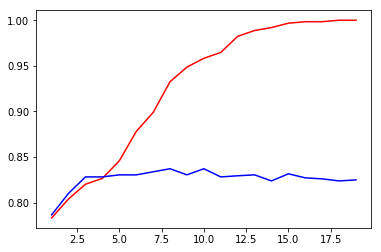

In [77]:
train_scores = []
test_scores = []
x_ticks = [*range(1, 20)]
for i in range(1, 20):
    clf = ensemble.RandomForestClassifier(n_estimators=142, random_state=66, max_depth=i)
    train_score = clf.fit(X_train, y_train).score(X_train, y_train)
    train_scores.append(train_score)
    
    mean_score = model_selection.cross_val_score(clf, X, y, cv=10).mean()
    test_scores.append(mean_score)
plt.plot(x_ticks, train_scores, c='r')
plt.plot(x_ticks, test_scores, c='b')
print(max(test_scores), x_ticks[test_scores.index(max(test_scores))])
plt.show()